In [1]:
print("Crutch to fix VSCode - product of small and poor company that cannot make Jupyter notebook run from first cell on first run, it runs from second on first launch and then runs from first (if using run all button)")

Crutch to fix VSCode - product of small and poor company that cannot make Jupyter notebook run from first cell on first run, it runs from second on first launch and then runs from first (if using run all button)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Лабораторная работа 3 Линейная КУ

$$y''-P^2(x)y=f(x)$$
$$P^2(x) = 10 + sin(2 \pi x)$$
$$f(x) = cos(2 \pi x)$$

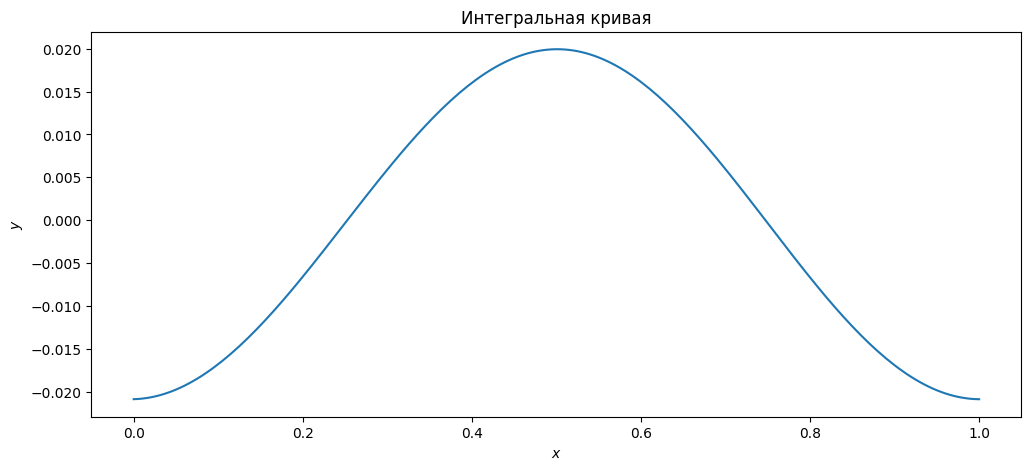

In [3]:
def f(x):
    return np.cos(2 * np.pi * x)

def P2(x):
    return 10 + np.sin(2 * np.pi * x)

h = 0.005

x_0 = 0
x_N = 1

N = int(np.round((x_N - x_0) / h)) + 1

A = np.zeros((N, N))
b = np.zeros(N)

for i in range(N):
    A[i][(i + 1) % N] = 1 / h**2
    A[i][(i + 0) % N] = -2 / h**2 - P2(i * h)
    A[i][(i - 1) % N] = 1 / h**2
    
    b[i] = f(i * h)

for i in range(1, N):
    b[i] -= b[i - 1] * A[i][i - 1] / A[i - 1][i - 1]
    A[i] -= A[i - 1] * A[i][i - 1] / A[i - 1][i - 1]

for i in range(0, N - 1):
    b[N - 1] -= b[i] * A[N - 1][i] / A[i][i]
    A[N - 1] -= A[i] * A[N - 1][i] / A[i][i]

for i in range(0, N - 1):
    b[i] -= b[N - 1] * A[i][N - 1] / A[N - 1][N - 1]
    A[i] -= A[N - 1] * A[i][N - 1] / A[N - 1][N - 1]

for i in range(N - 2, -1, -1):
    b[i] -= b[i + 1] * A[i][i + 1] / A[i + 1][i + 1]
    A[i] -= A[i + 1] * A[i][i + 1] / A[i + 1][i + 1]

for i in range(N):
    b[i] /= A[i][i]

plt.figure(figsize=(12, 5))
plt.plot(np.linspace(x_0, x_N, N), b) 
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Интегральная кривая")
plt.show()
